In [1]:
import os
import glob
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
image_dir = r"C:\Users\dhika\Downloads\images"
image_path = sorted(glob.glob(os.path.join(image_dir, '*.png')))
print(image_path)

['C:\\Users\\dhika\\Downloads\\images\\baseball-player.png', 'C:\\Users\\dhika\\Downloads\\images\\clown-fish.png', 'C:\\Users\\dhika\\Downloads\\images\\elephant.png', 'C:\\Users\\dhika\\Downloads\\images\\forklift.png', 'C:\\Users\\dhika\\Downloads\\images\\ice-cream.png', 'C:\\Users\\dhika\\Downloads\\images\\lemons.png', 'C:\\Users\\dhika\\Downloads\\images\\magnetic-compass.png', 'C:\\Users\\dhika\\Downloads\\images\\polar-bear.png']


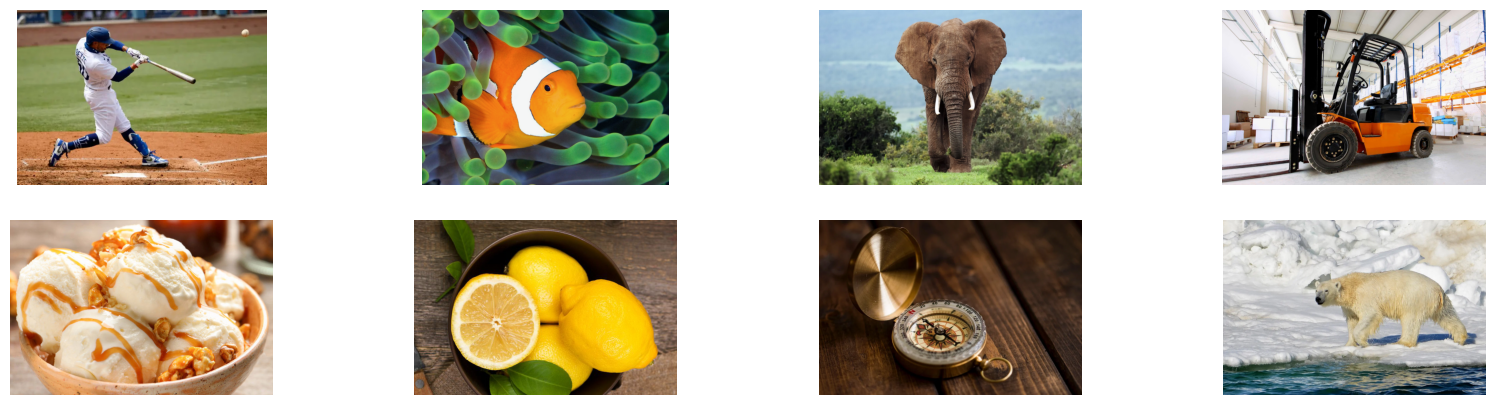

In [3]:
plt.figure(figsize=[20,5])
for idx, image_path in enumerate (image_path):
    image=plt.imread(image_path)
    plt.subplot(2,4,idx+1)
    plt.imshow(image)
    plt.axis('off')

In [4]:
model_vgg16 = tf.keras.applications.vgg16.VGG16()
model_resnet50 = tf.keras.applications.resnet50.ResNet50()
model_inception_v3 = tf.keras.applications.InceptionV3()

In [5]:
print(model_vgg16.input_shape)
print(model_resnet50.input_shape)
print(model_inception_v3.input_shape)

(None, 224, 224, 3)
(None, 224, 224, 3)
(None, 299, 299, 3)


In [6]:
def process_image(model, image_paths,size,preprocess_input,display_top_k=False,top_k=2):
    plt.figure(figsize=[20,5])
    for idx, image_path in enumerate (image_paths):
        tf_image = tf.io.read_file(image_path)
        decoded_image = tf.image.decode_image(tf_image)
        image_resized = tf.image.resize(decoded_image,size)
        image_batch = tf.expand_dims(image_resized, axis=0)
        image_batch = preprocess_input(image_batch)
        preds = model.predict (image_batch)
        
        decoded_preds = tf.keras.applications.imagenet_utils.decode_predictions(
            preds=preds,
            top=5
        )

        if display_top_k == True:
            for jdx in range(top_k):
                print("Top {} Predicted class: Pr(Class={:20} [index={:4}]) = {:5.2f}".format(
                    jdx+1, decoded_preds[0][jdx][1],jdx,decoded_preds[0][jdx][2]*100)
                )
        
        plt.subplot(2,4,idx+1)
        plt.imshow(decoded_image)
        plt.axis('off')
        label=decoded_preds[0][0][1]
        score=decoded_preds[0][0][2] * 100
        title = label + ' ' + str('{:.2f}%'.format(score))
        plt.title(title,fontsize=16)

In [7]:
image_dir = r"C:\Users\dhika\Downloads\images"
image_path = sorted(glob.glob(os.path.join(image_dir, '*.png')))
print(image_path)

['C:\\Users\\dhika\\Downloads\\images\\baseball-player.png', 'C:\\Users\\dhika\\Downloads\\images\\clown-fish.png', 'C:\\Users\\dhika\\Downloads\\images\\elephant.png', 'C:\\Users\\dhika\\Downloads\\images\\forklift.png', 'C:\\Users\\dhika\\Downloads\\images\\ice-cream.png', 'C:\\Users\\dhika\\Downloads\\images\\lemons.png', 'C:\\Users\\dhika\\Downloads\\images\\magnetic-compass.png', 'C:\\Users\\dhika\\Downloads\\images\\polar-bear.png']


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


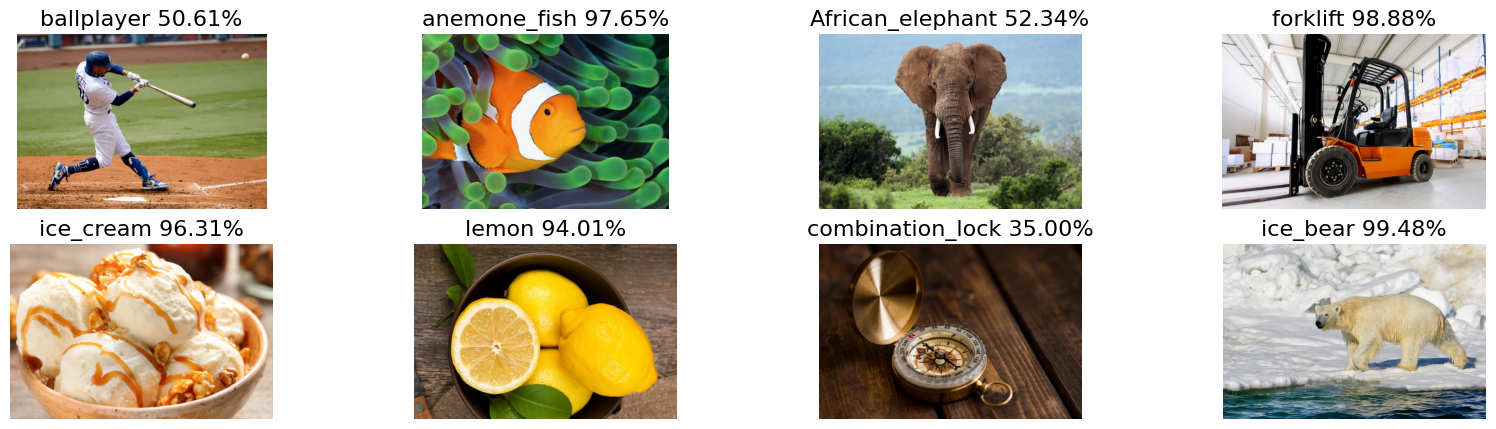

In [8]:

model = model_vgg16
size = (224, 224)

preprocess_input = tf.keras.applications.vgg16.preprocess_input

process_image(model, image_path, size, preprocess_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


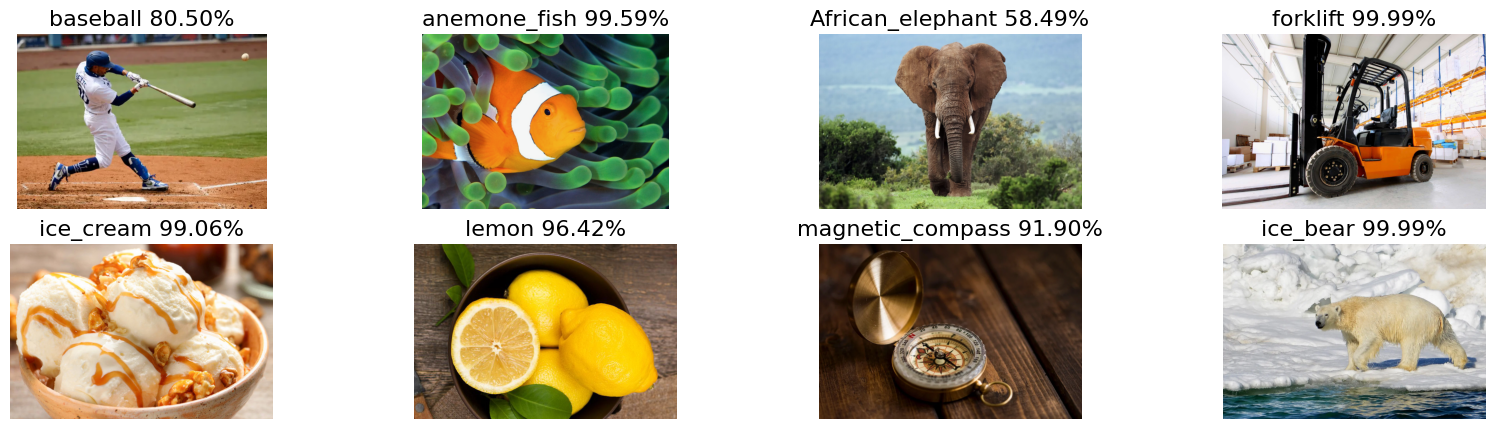

In [9]:

model = model_resnet50
size = (224, 224)

preprocess_input = tf.keras.applications.resnet50.preprocess_input

process_image(model, image_path, size, preprocess_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


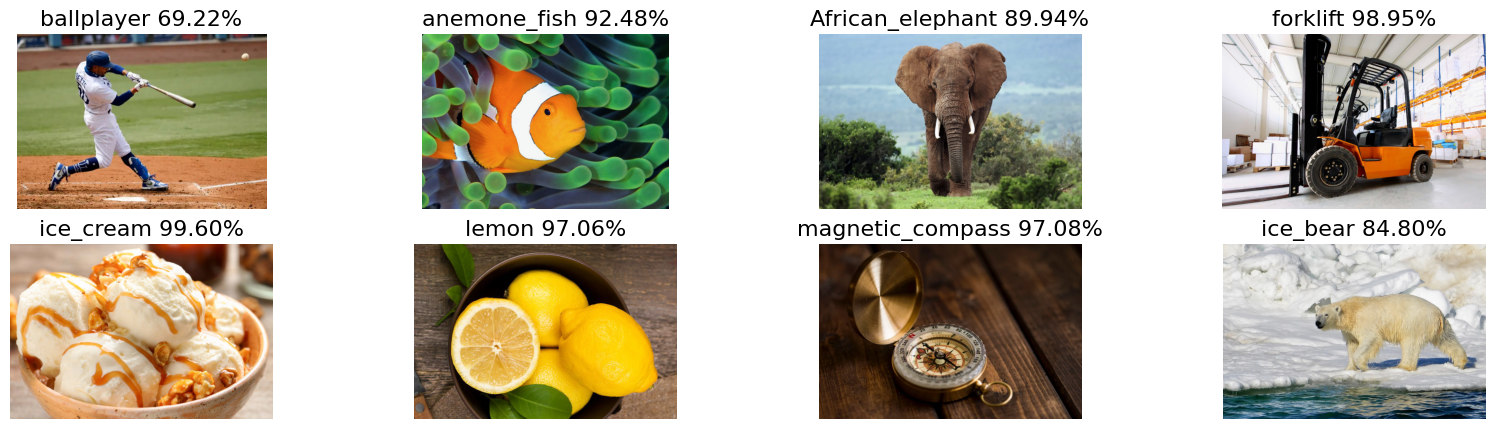

In [10]:

model = model_inception_v3
size = (299, 299)

preprocess_input = tf.keras.applications.inception_v3.preprocess_input

process_image(model, image_path, size, preprocess_input)

In [13]:
image_dir = [tf.constant(r"C:\Users\dhika\Downloads\forklift_detector\forklift.jpg")]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


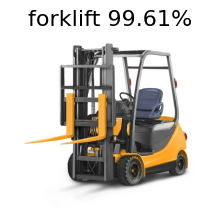

In [14]:

model = model_inception_v3
size = (299, 299)
image_paths=image_dir
preprocess_input = tf.keras.applications.inception_v3.preprocess_input

process_image(model, image_paths, size, preprocess_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


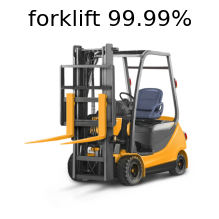

In [15]:

model = model_resnet50
size = (224, 224)
image_paths=image_dir
preprocess_input = tf.keras.applications.resnet50.preprocess_input

process_image(model, image_paths, size, preprocess_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


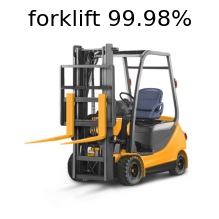

In [16]:
model = model_vgg16
size = (224, 224)
image_paths=image_dir
preprocess_input = tf.keras.applications.resnet50.preprocess_input

process_image(model, image_paths, size, preprocess_input)

In [32]:
import cv2
net_model = model_resnet50

def preprocess_input(frame):
    return frame


def process_video(model, size, preprocess_input, frame, display_top_k=False, top_k=2):
    original_frame = frame.copy()
    frame = cv2.resize(frame, size)
    
    frame_np = frame
    frame_np = tf.image.convert_image_dtype(frame, tf.uint8).numpy()

    frame_np = preprocess_input(frame_np)
    frame_np = tf.expand_dims(frame_np, 0)  
    
    preds = model.predict(frame_np)
    
    decoded_preds = tf.keras.applications.imagenet_utils.decode_predictions(
        preds=preds,
        top=5
    )

    label = decoded_preds[0][0][1]
    score = decoded_preds[0][0][2] * 100
    
    frame_np = frame_np.numpy().squeeze(0)
    
    original_frame = cv2.resize(original_frame, (800, 600))  
    cv2.rectangle (original_frame,(5,0),(180,25),(0,0,0),-1)
    cv2.putText(original_frame, label + ' ' + str('{:.2f}%'.format(score)), (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    if label == 'forklift' and score >= 75:
        cv2.rectangle (original_frame,(5,25),(400,50),(0,0,0),-1)
        cv2.putText(original_frame, "Warning there is forklift please clear the way",(10, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
    return original_frame

cap = cv2.VideoCapture(0)

while True:
    ret, frame_np = cap.read()
    if not ret:
        break
    objects = process_video(net_model, (224, 224), preprocess_input, frame_np, display_top_k=True)
    cv2.imshow('object detection', objects)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


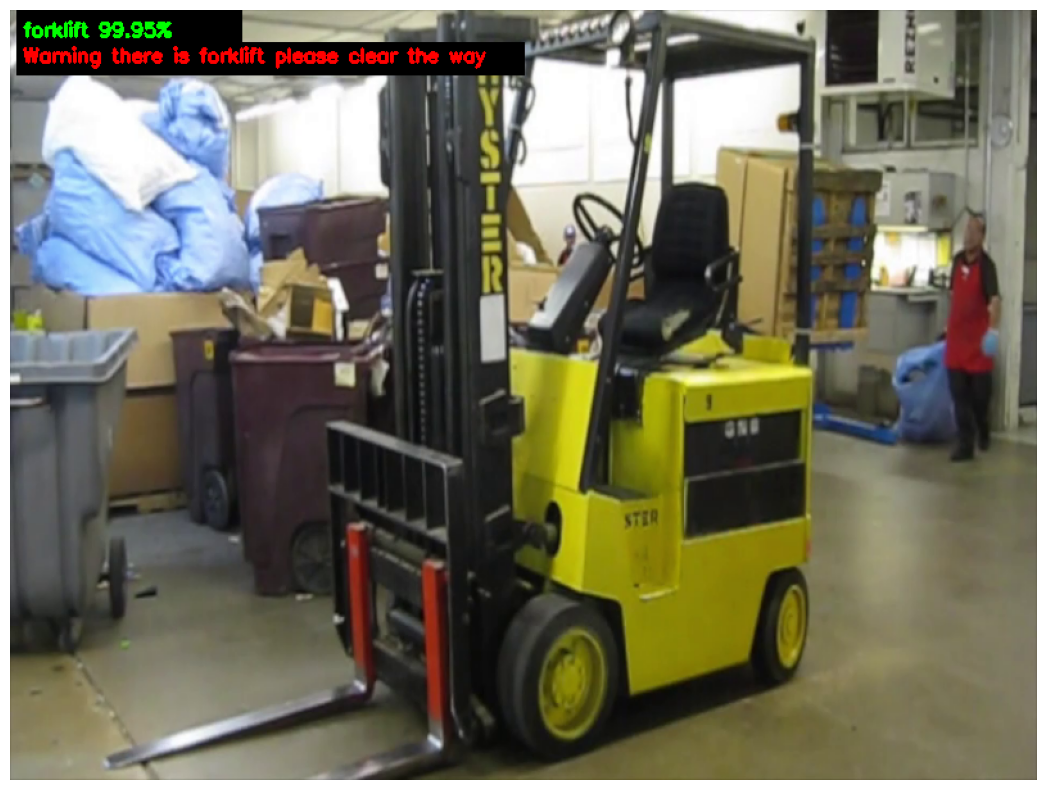

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


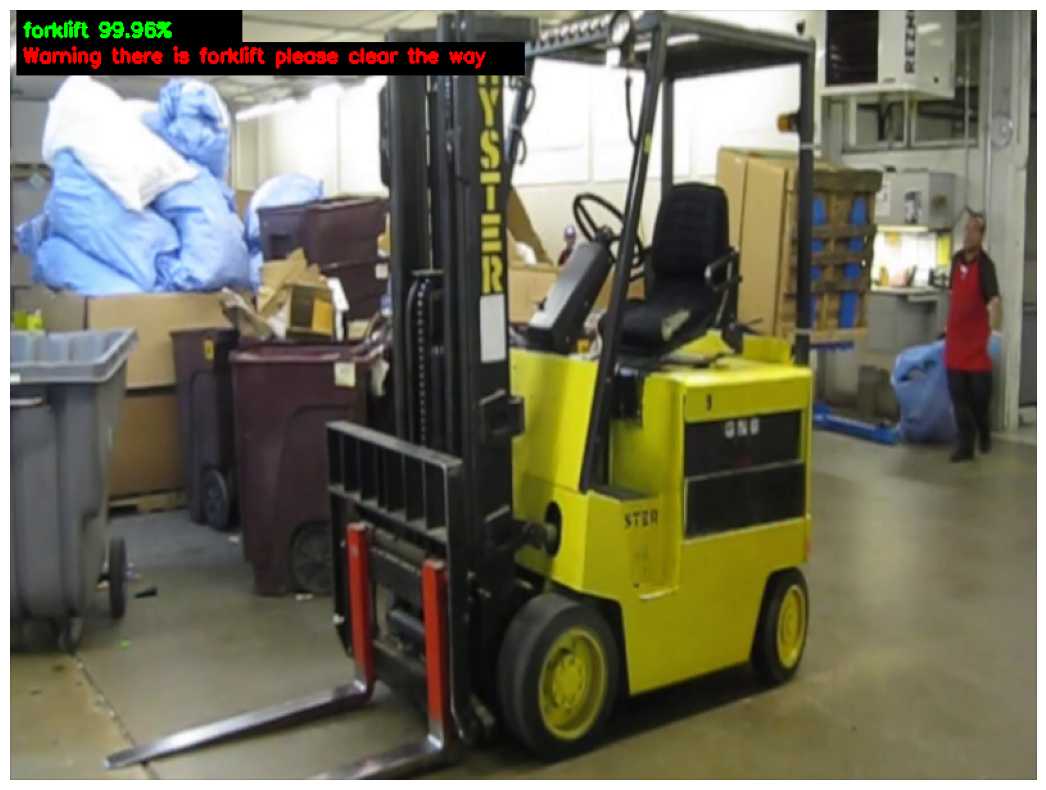

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


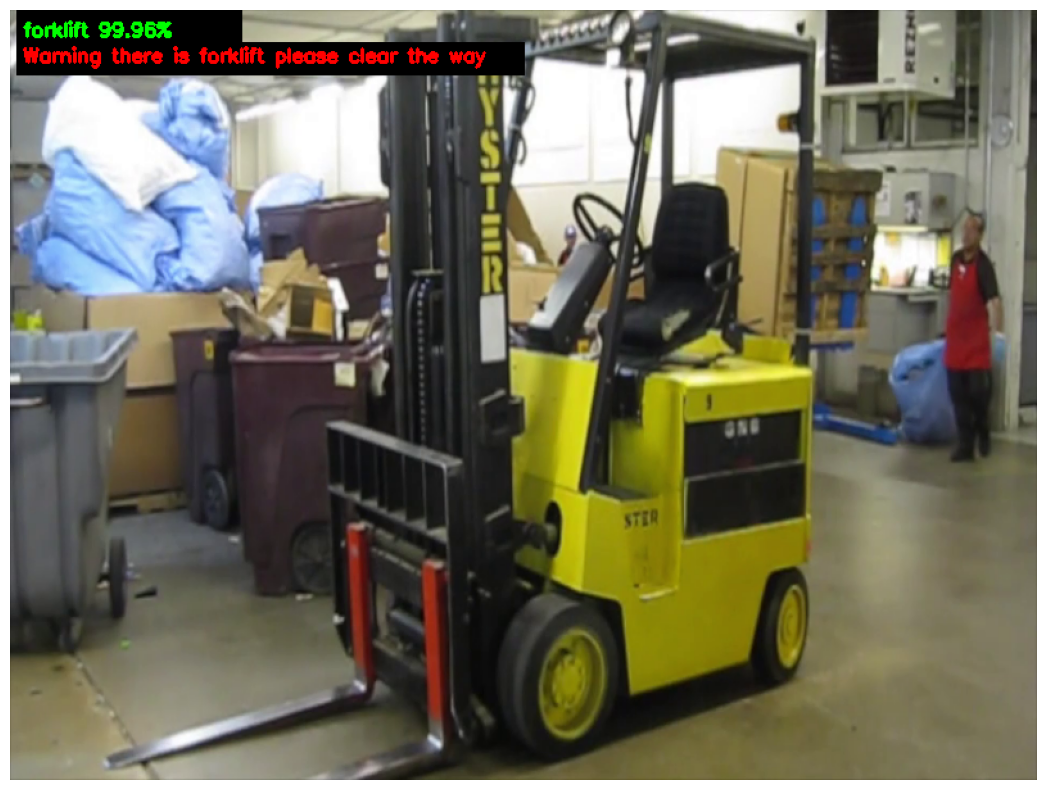

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


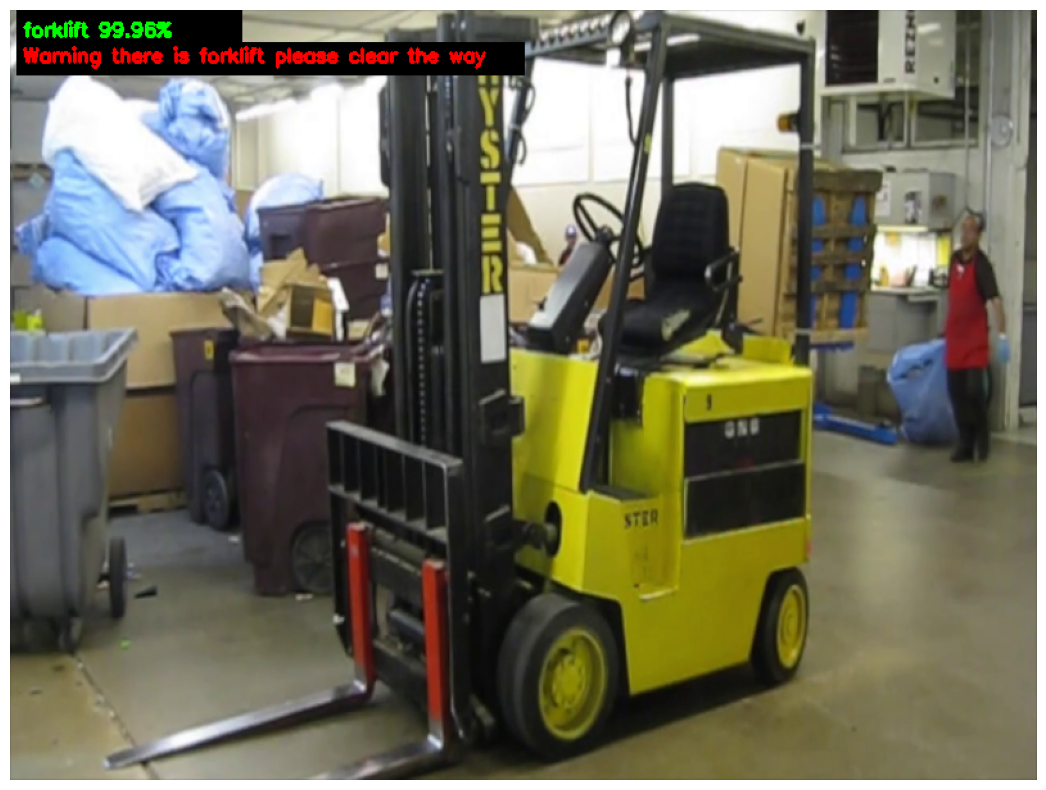

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


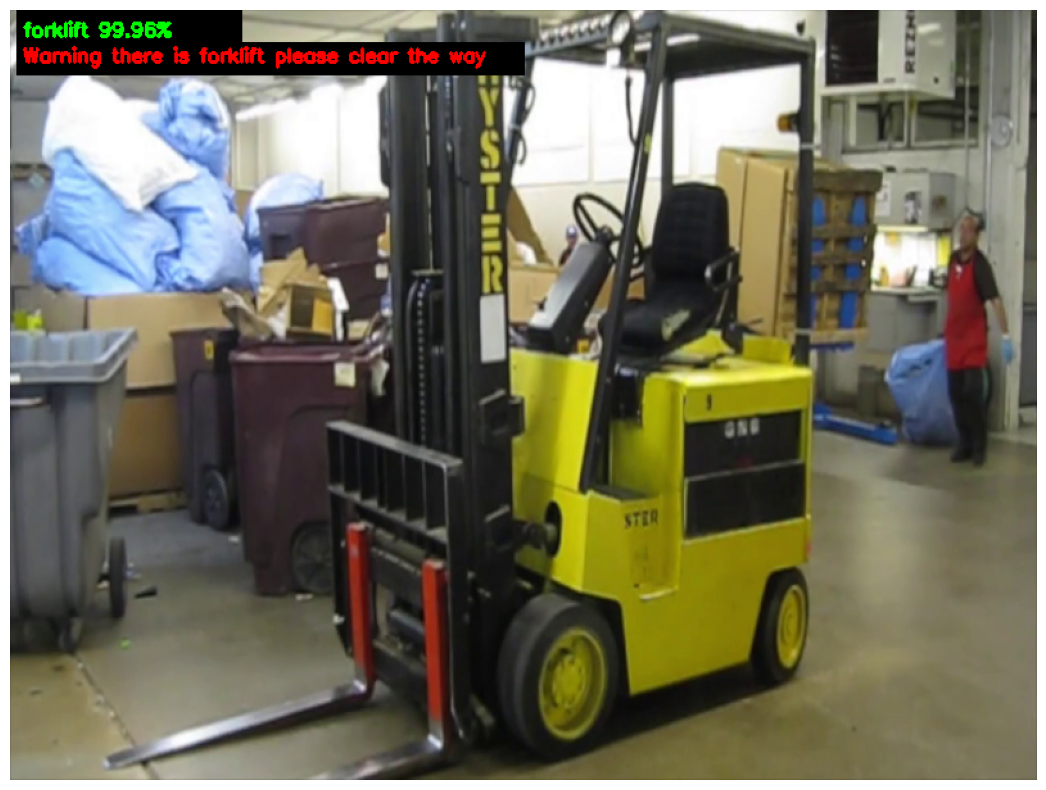

In [36]:
net_model = model_resnet50

def preprocess_input(frame):

    return frame


def process_video(model, size, preprocess_input, frame, display_top_k=False, top_k=2):
    original_frame = frame.copy() 
    frame = cv2.resize(frame, size)
    
    frame_np = frame
    frame_np = tf.image.convert_image_dtype(frame, tf.uint8).numpy()
    frame_np = preprocess_input(frame_np)
    frame_np = tf.expand_dims(frame_np, 0)
    
    preds = model.predict(frame_np)
    
    decoded_preds = tf.keras.applications.imagenet_utils.decode_predictions(
        preds=preds,
        top=5
    )
    
    label = decoded_preds[0][0][1]
    score = decoded_preds[0][0][2] * 100
    

    frame_np = frame_np.numpy().squeeze(0)

    original_frame = cv2.resize(original_frame, (800, 600))  
    if label == 'forklift' and score >= 75:
        cv2.rectangle (original_frame,(5,0),(180,25),(0,0,0),-1)
        cv2.putText(original_frame, label + ' ' + str('{:.2f}%'.format(score)), (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        cv2.rectangle (original_frame,(5,25),(400,50),(0,0,0),-1)
        cv2.putText(original_frame, "Warning there is forklift please clear the way",(10, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
        
        cv2.imshow('forklift detector',original_frame[:,:,::-1])
        plt.figure(figsize=(30, 10))
        plt.axis('off')
        plt.imshow(original_frame)
        plt.show()
    return original_frame
    
cap = cv2.VideoCapture(r"C:\Users\dhika\Downloads\Test_Forklift.mp4") 

while True:
    ret, frame_np = cap.read()
    if not ret:
        break
    objects = process_video(net_model, (224, 224), preprocess_input, frame_np[:,:,::-1], display_top_k=True)

        
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


cap.release()
cv2.destroyAllWindows()